*Name: Muhammad Umar*

Roll Number: SU92-BSAIM-F24-057

**Prepare Files & Environment**

In [1]:
# STEP 1: Prepare Files & Environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

import pickle

print("Environment ready!")


Environment ready!


**Load Dataset**

In [2]:
# STEP 2: Load Dataset

df = pd.read_csv("StudentsPerformance.csv")
print("Dataset Loaded!")
df.head()


Dataset Loaded!


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Inspect Dataset**

In [3]:
# STEP 3: Inspect Dataset

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Manage Data types**

In [4]:
def convertObjToInt(cols):
    for i in cols:
        data = pd.DataFrame({i:df[i].unique()})
        data_LE = LabelEncoder()
        data_LE.fit(np.ravel(data))    # data_LE.fit(data)
        df[i] = data_LE.transform(df[i])
        
columns = ['gender', 'race/ethnicity', 'parental level of education','lunch' , 'test preparation course' ]
convertObjToInt(columns)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


In [6]:
cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df[cols] = df[cols].astype('int64')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


**Clean & Preprocess Data**

In [8]:
# STEP 4: Data Cleaning

print("Missing values per column:")
df.isnull().sum()


Missing values per column:


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.fillna(df.mode().iloc[0], inplace=True)
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


**Explore & Visualize Data**

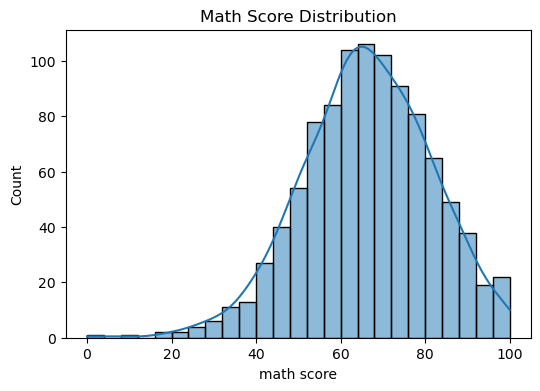

In [10]:
# STEP 5: Visualization - Score Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['math score'], kde=True)
plt.title("Math Score Distribution")
plt.show()


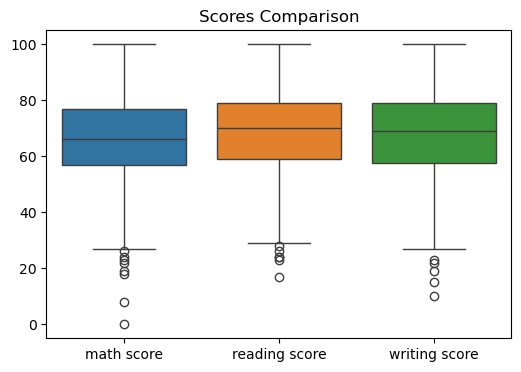

In [11]:
# Boxplot Comparison
plt.figure(figsize=(6,4))
sns.boxplot(data=df[['math score','reading score','writing score']])
plt.title("Scores Comparison")
plt.show()


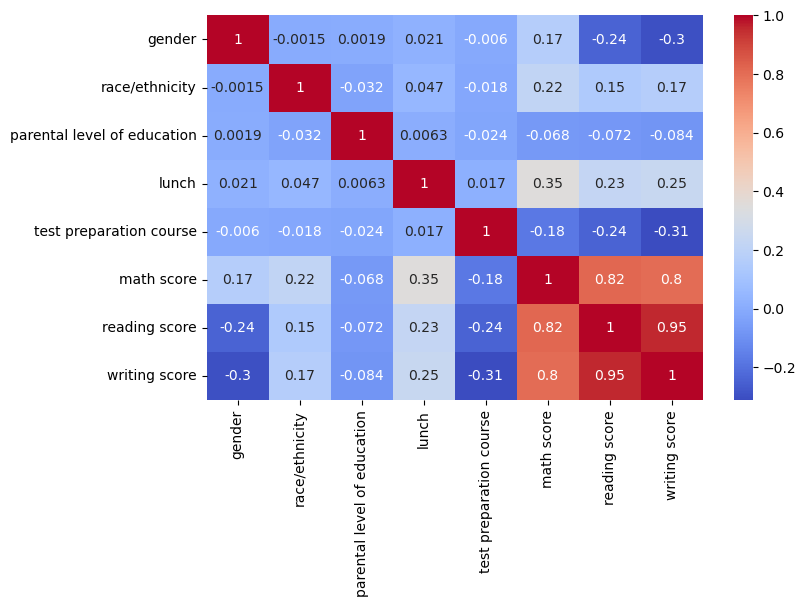

In [12]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()


**Feature Engineering**

In [13]:
# STEP 6: Feature Engineering

df['avg_score'] = df[['math score','reading score','writing score']].mean(axis=1)

df['Grade'] = pd.cut(
    df['avg_score'],
    bins=[0, 60, 70, 80, 100],
    labels=['F', 'C', 'B', 'A']
)

df[['avg_score','Grade']].head()


,avg_score,Grade
0,72.666667,B
1,82.333333,A
2,92.666667,A
3,49.333333,F
4,76.333333,B


**Encode Categorical Columns**

In [14]:
# STEP 7: Label Encoding

categorical_cols = [
    'gender', 
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
]

encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,Grade
0,0,1,1,1,1,72,72,74,72.666667,B
1,0,2,4,1,0,69,90,88,82.333333,A
2,0,1,3,1,1,90,95,93,92.666667,A
3,1,0,0,0,1,47,57,44,49.333333,F
4,1,2,4,1,1,76,78,75,76.333333,B


**Split & Scale Features**

In [15]:
# STEP 8: Split & Scale

X = df[categorical_cols]
y = df['avg_score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


**Train Model 1: Linear Regression**

In [16]:
# STEP 9: Linear Regression Model

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

pred_lr = model_lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, pred_lr))
print("MSE:", mean_squared_error(y_test, pred_lr))


Linear Regression R2: 0.1255652122569746
MSE: 187.4495832223678


**Train Model 2: RandomForest Regressor**

In [17]:
# STEP 10: RandomForest Regressor

model_rf = RandomForestRegressor(n_estimators=200)
model_rf.fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)

print("RandomForest R2:", r2_score(y_test, pred_rf))
print("MSE:", mean_squared_error(y_test, pred_rf))


RandomForest R2: -0.03209457520208181
MSE: 221.24657056136212


**Train Final Grade Classifier for Flask**

In [18]:
# STEP 11: Train Final Classification Model (A/B/C/F)

X_class = df[categorical_cols]
y_class = df['Grade']

model_final = RandomForestClassifier()
model_final.fit(X_class, y_class)

print("Final Model Ready!")


Final Model Ready!


**Save model_files.pkl (For Flask)**

In [19]:
# STEP 12: Save Model & Encoders

data = {
    "model": model_final,
    "encoders": encoders
}

with open("model_files.pkl", "wb") as f:
    pickle.dump(data, f)

print("model_files.pkl saved successfully!")


model_files.pkl saved successfully!
